In [3]:
from tqdm import tqdm 
import tensorflow as tf 
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from io import BytesIO
import time
import os
import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import pickle

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import sys
!{sys.executable} -m pip install tqdm

    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:01


In [4]:
model = ResNet50(weights='imagenet', pooling=max, include_top = False)

/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 10s 0us/step


In [5]:
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
image_names=[]


for i in range(0,len(Category)) :
    path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category[i]
    for img_path in os.listdir(path):
        if('.DS_Store' not in os.path.join(path,img_path)):
            image_names.append(img_path)
        

In [6]:
image_names

['4153_comsumer_08.jpg',
 '4154_shop_01.jpg',
 '4155_shop_02.jpg',
 '4156_comsumer_07.jpg',
 '4157_comsumer_06.jpg',
 '4158_comsumer_04.jpg',
 '4159_comsumer_05.jpg',
 '4160_comsumer_01.jpg',
 '4161_comsumer_02.jpg',
 '4162_comsumer_03.jpg',
 '4163_shop_01.jpg',
 '4164_comsumer_01.jpg',
 '4165_shop_01.jpg',
 '4166_comsumer_01.jpg',
 '4167_shop_01.jpg',
 '4168_comsumer_01.jpg',
 '4169_shop_01.jpg',
 '4170_comsumer_01.jpg',
 '4171_shop_01.jpg',
 '4172_comsumer_01.jpg',
 '4173_shop_01.jpg',
 '4174_comsumer_01.jpg',
 '4175_comsumer_08.jpg',
 '4176_shop_01.jpg',
 '4177_shop_02.jpg',
 '4178_comsumer_07.jpg',
 '4179_comsumer_06.jpg',
 '4180_comsumer_04.jpg',
 '4181_comsumer_05.jpg',
 '4182_comsumer_01.jpg',
 '4183_comsumer_02.jpg',
 '4184_comsumer_03.jpg',
 '4185_shop_01.jpg',
 '4186_comsumer_04.jpg',
 '4187_comsumer_05.jpg',
 '4188_comsumer_01.jpg',
 '4189_comsumer_02.jpg',
 '4190_comsumer_03.jpg',
 '4191_shop_01.jpg',
 '4192_shop_02.jpg',
 '4193_comsumer_01.jpg',
 '4194_comsumer_02.jpg',
 '

In [9]:
start = time.time()
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']


pickled_db_path = "features_resnet/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        res_loaded_1 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [10]:
pickled_db_path = "features_resnet/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        res_loaded_2 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [11]:
res_loaded = np.append(res_loaded_1, res_loaded_2,axis=0)

In [12]:
pickled_db_path = "features_resnet/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        res_loaded_3 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [13]:
res_loaded = np.append(res_loaded, res_loaded_3,axis=0)

In [14]:
query_image_path = "images_for_testing/108_comsumer_03.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
res50_feature_query = model.predict(img_dataq)
res50_feature_np_query = np.array(res50_feature_query)
res50_feature_np_query = res50_feature_np_query.flatten()

In [15]:
res50_feature_np_query.shape

(100352,)

In [17]:
from scipy.spatial import distance

similarity = []
count = 0

for i in res_loaded:
    count = count+1
    d = distance.cosine(i,res50_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [18]:
similarity

[(0.2060048133134842, '4153_comsumer_08.jpg'),
 (0.07752814143896103, '4154_shop_01.jpg'),
 (0.09167100489139557, '4155_shop_02.jpg'),
 (0.15569542348384857, '4156_comsumer_07.jpg'),
 (0.12750130891799927, '4157_comsumer_06.jpg'),
 (0.09403599053621292, '4158_comsumer_04.jpg'),
 (0.09339728206396103, '4159_comsumer_05.jpg'),
 (0.12767864763736725, '4160_comsumer_01.jpg'),
 (0.11981562525033951, '4161_comsumer_02.jpg'),
 (0.09876928478479385, '4162_comsumer_03.jpg'),
 (0.0882171243429184, '4163_shop_01.jpg'),
 (0.10119497776031494, '4164_comsumer_01.jpg'),
 (0.10180012136697769, '4165_shop_01.jpg'),
 (0.08440889418125153, '4166_comsumer_01.jpg'),
 (0.10658974945545197, '4167_shop_01.jpg'),
 (0.12026018649339676, '4168_comsumer_01.jpg'),
 (0.11744368076324463, '4169_shop_01.jpg'),
 (0.12459239363670349, '4170_comsumer_01.jpg'),
 (0.13715413212776184, '4171_shop_01.jpg'),
 (0.08977888524532318, '4172_comsumer_01.jpg'),
 (0.07767914235591888, '4173_shop_01.jpg'),
 (0.20274879038333893, '41

In [19]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


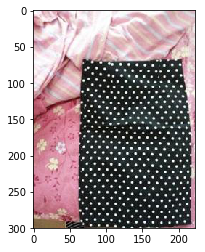

Result images ========================================
similarity 0.3120441436767578


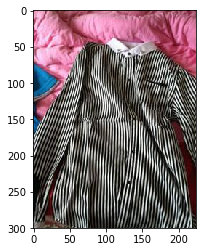

similarity 0.3120441436767578


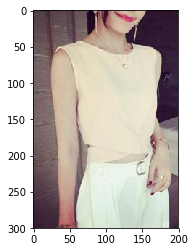

similarity 0.3120441436767578


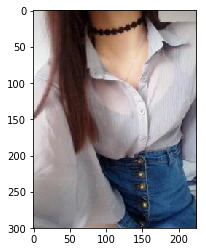

similarity 0.2888355851173401


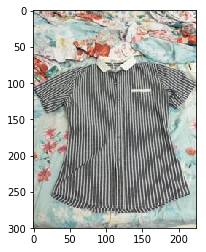

similarity 0.2888355851173401


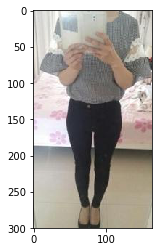

similarity 0.2888355851173401


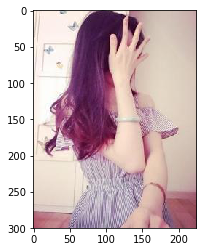

In [20]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]


path1= '/Users/Student/Downloads/visual_search/models/Data/total_data/'

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    result_image_path = path1+ "/"+des_similarity[i][1]
    if(os.path.isfile(result_image_path) ):
        show_img(result_image_path)
        
        
    
end = time.time()

In [21]:
total_time_main = end - start
print("total_time_main", total_time_main)

total_time_main 165.7910418510437
